# Image Super Resolution

The objective of this notebook is to develop and experiment with a super resolution model. 
Super resolution models learn to fill in details in images that suffer from high compression and low resolution.

TODO: Complete

In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.preprocessing.image import img_to_array
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Constants
IMG_SIZE = (256, 256)
IMPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)

## Data Preparation

### Dataset
The dataset selected to train the model is composed of a set of images in both high and low resolution. It can be found on Kaggle:

https://www.kaggle.com/datasets/adityachandrasekhar/image-super-resolution

TODO: Dataset in git?? Instructions

In [37]:
def load_data(path):
    # Load the images
    images = []
    for filename in os.listdir(path):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMG_SIZE)
            img = img.astype('float32') / 255.0
            images.append(img_to_array(img))
    return np.array(images)

In [38]:
x_train = load_data("data/dataset/train/low_res")
y_train = load_data("data/dataset/train/high_res")

x_test = load_data("data/dataset/val/low_res")
y_test = load_data("data/dataset/val/high_res")

print("Train input loaded with shape: {}".format(x_train[0].shape))
print("Train output loaded with shape: {}".format(y_train[0].shape))
print("Test input loaded with shape: {}".format(x_test[0].shape))
print("Test output loaded with shape: {}".format(y_test[0].shape))

Train input loaded with shape: (256, 256, 3)
Train output loaded with shape: (256, 256, 3)
Test input loaded with shape: (256, 256, 3)
Test output loaded with shape: (256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

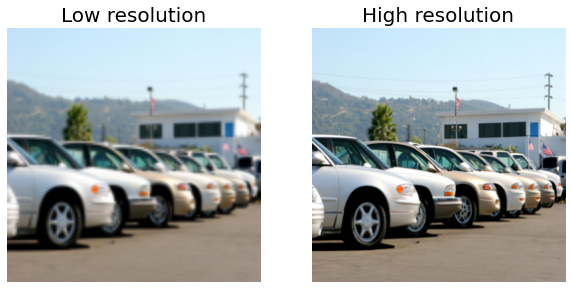

In [39]:
a = np.random.randint(0, len(x_train))
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(x_train[a])
plt.title("Low resolution", fontsize=20)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(y_train[a])
plt.title("High resolution", fontsize=20)
plt.axis('off')

## Model

The model is defined using Keras API from Google's Tensorflow. For this problem we are defining a neural network making use of the Conv2D layers.

In [40]:
# Hiperparameters
BATCH_SIZE = 1
LEARNING_RATE = 0.001
EPOCHS = 10
PATIENCE = 5
MIN_DELTA = 0.001
RESTORE = True
DROPOUT = 0.3

conv_args = {
    "activation": "relu",
    "kernel_initializer": "Orthogonal",
    "padding": "same",
}

# Model definition
model = keras.Sequential([
    layers.Input(shape=IMPUT_SHAPE),
    layers.Conv2D(64, 5, **conv_args),
    layers.Conv2D(32, 3, **conv_args),
    layers.Conv2D(3, 3, **conv_args),
])

# Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mean_absolute_error', metrics=['acc'])
model.summary()

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=PATIENCE, min_delta=MIN_DELTA, restore_best_weights=RESTORE)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      4864      
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 3)       867       
                                                                 
Total params: 24,195
Trainable params: 24,195
Non-trainable params: 0
_________________________________________________________________


Training

In [43]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
685/685 [==============================] - 83s 122ms/step - loss: 0.0399 - acc: 0.7185 - val_loss: 0.0363 - val_acc: 0.6805
Epoch 2/10
685/685 [==============================] - 85s 124ms/step - loss: 0.0290 - acc: 0.7523 - val_loss: 0.0296 - val_acc: 0.7356
Epoch 3/10
685/685 [==============================] - 83s 122ms/step - loss: 0.0290 - acc: 0.7839 - val_loss: 0.0226 - val_acc: 0.8184
Epoch 4/10
685/685 [==============================] - 83s 121ms/step - loss: 0.0268 - acc: 0.7870 - val_loss: 0.0244 - val_acc: 0.7864
Epoch 5/10
685/685 [==============================] - 83s 122ms/step - loss: 0.0270 - acc: 0.7885 - val_loss: 0.0315 - val_acc: 0.7134
Epoch 6/10
685/685 [==============================] - 80s 117ms/step - loss: 0.0270 - acc: 0.7870 - val_loss: 0.0308 - val_acc: 0.8876
Epoch 7/10
685/685 [==============================] - 78s 114ms/step - loss: 0.0268 - acc: 0.7901 - val_loss: 0.0272 - val_acc: 0.7329
Epoch 8/10
685/685 [==============================] - 7

In [41]:
# v1: loss: 0.0251 - acc: 0.8019 - val_loss: 0.0225 - val_acc: 0.7728

# Save weights
# model.save_weights("upscaler_v1.h5")

# Load weights
# model.load_weights("upscaler_v1.h5")

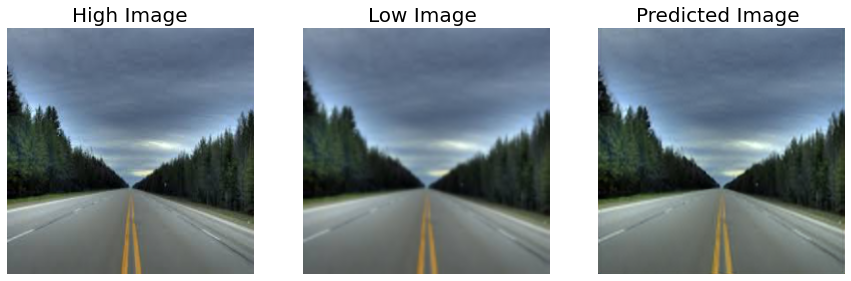

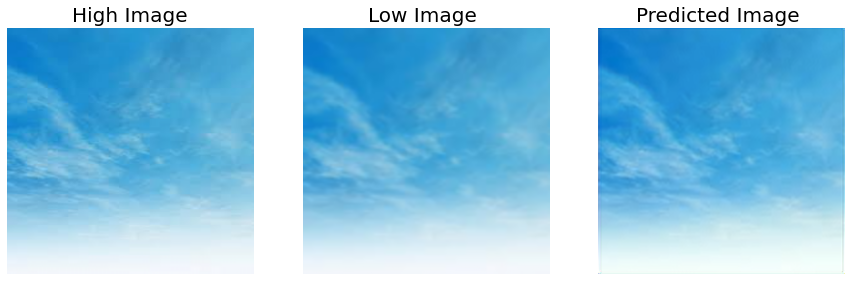

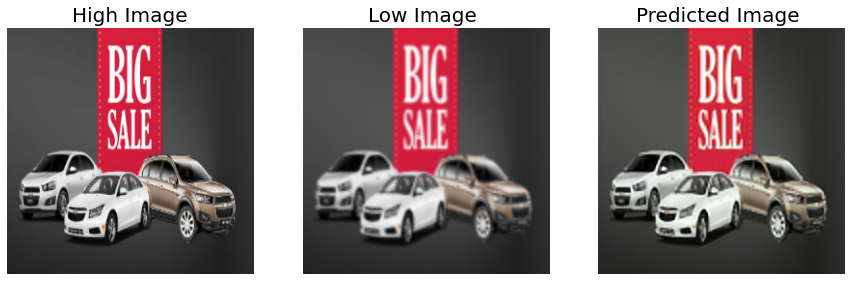

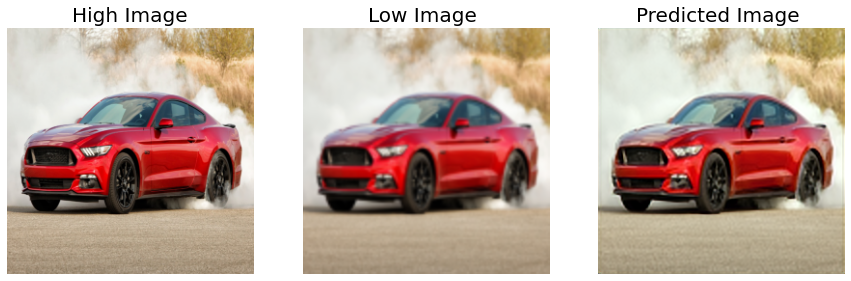

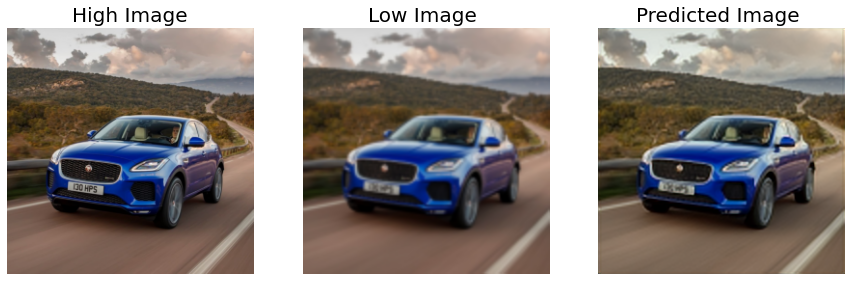

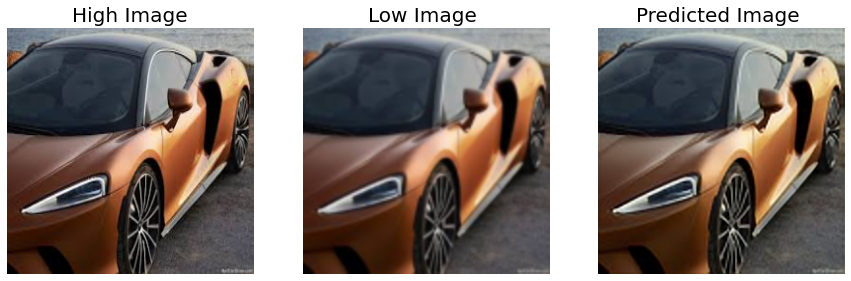

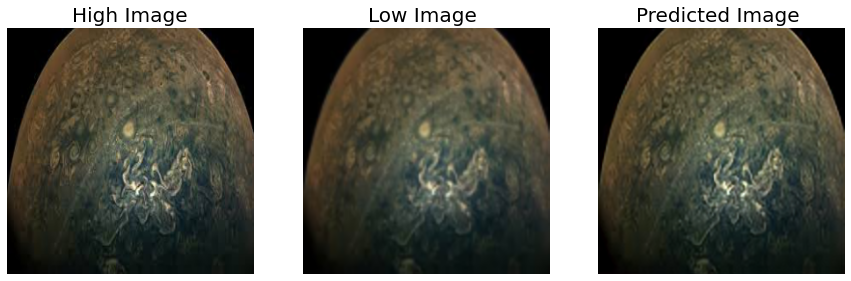

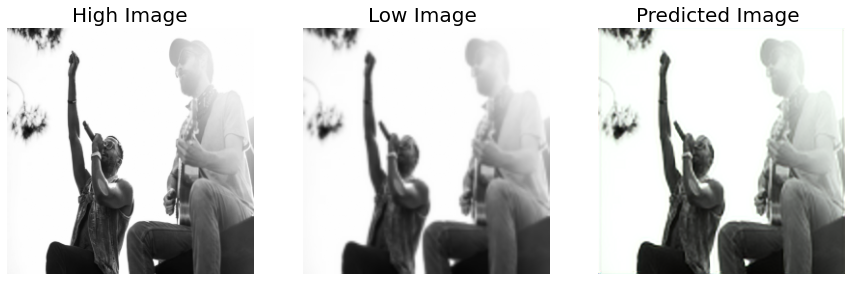

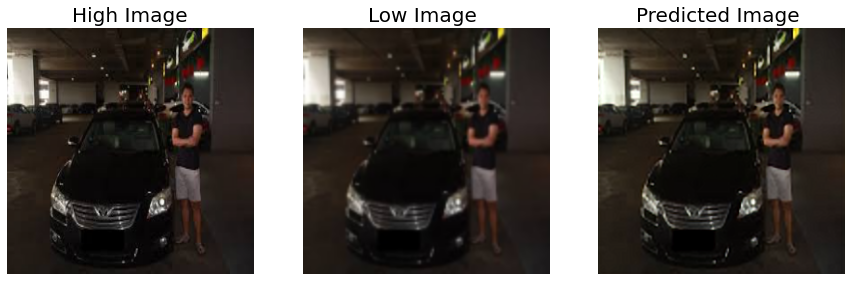

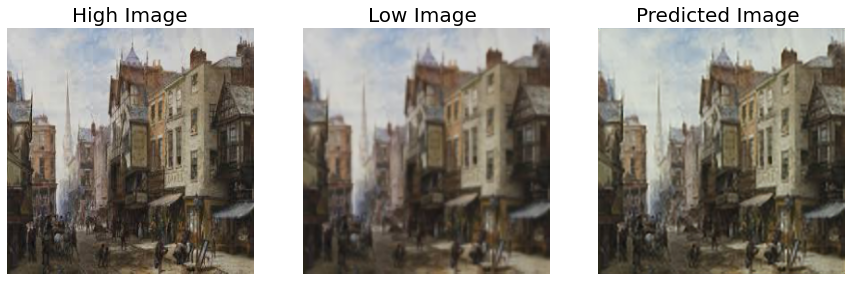

In [86]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', fontsize = 20)
    plt.axis('off')
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', fontsize = 20)
    plt.axis('off')
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', fontsize = 20)
    plt.axis('off')
    plt.imshow(predicted)
   
    plt.show()

for i in range(20, 30):
    predicted = np.clip(model.predict(x_test[i].reshape(1,256,256,3)),0.0,1.0).reshape(256,256,3)
    plot_images(y_test[i],x_test[i],predicted)

### Testing App Workflow

(-0.5, 255.5, 255.5, -0.5)

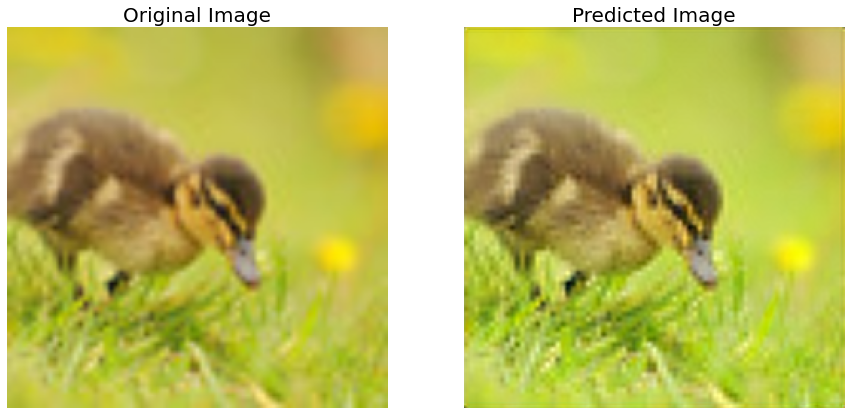

In [85]:
sample_image = cv2.imread(os.path.join("data/workflow", "ducky.jpg"))
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, IMG_SIZE)
sample_image = sample_image.astype('float32') / 255.0
sample_input = img_to_array(sample_image)

sample_prediction = np.clip(model.predict(sample_input.reshape(1,256,256,3)),0.0,1.0).reshape(256,256,3)

sample_reshaped = cv2.resize(sample_prediction, (sample_image.shape[1], sample_image.shape[0]))

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image", fontsize=20)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sample_reshaped)
plt.title("Predicted Image", fontsize=20)
plt.axis('off')
